In [42]:
#! jupyter nbconvert --to html dataset-preprocess.ipynb

In [43]:
import os
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# import random
# random.seed(42)
# np.random.seed(42)
# np.random.RandomState(42)
# os.environ['TF_DETERMINISTIC_OPS'] = '1' 

In [44]:
finish_sound = "afplay /Users/mehmet/Documents/vs-code/winsquare.mp3"
# play sound when finished
os.system(finish_sound)

0

In [45]:
classes = ['Non_Demented','Very_Mild_Demented','Mild_Demented','Moderate_Demented']
folder_path = '/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
datafile = ['','','','']
dataframe = pd.DataFrame()
for i in range(len(classes)):
    datafile[i] = sorted(os.listdir(folder_path + classes[i]))
    filenames = pd.DataFrame(datafile[i], columns=['filename'])
    class_labels = pd.DataFrame(np.full((len(datafile[i]),1), classes[i]), columns=['class_label'])
    dataframe = pd.concat([dataframe, pd.concat([filenames, class_labels], axis=1)], axis=0)
# delete index
dataframe = dataframe.reset_index(drop=True)
# change all class labels, drop last 9 characters and make them lowercase
dataframe['class_label'] = dataframe['class_label'].str[:-9]
dataframe.head()

,filename,class_label
0,non.jpg,Non
1,non_10.jpg,Non
2,non_100.jpg,Non
3,non_1000.jpg,Non
4,non_1001.jpg,Non


In [46]:
class_counts = []
for i in datafile:
    class_counts.append(len(i)) 
    print('There are',len(i),'images belonging to',classes[datafile.index(i)], 'class')
print('Total number of images:', sum(class_counts))

There are 3200 images belonging to Non_Demented class
There are 2240 images belonging to Very_Mild_Demented class
There are 896 images belonging to Mild_Demented class
There are 64 images belonging to Moderate_Demented class
Total number of images: 6400


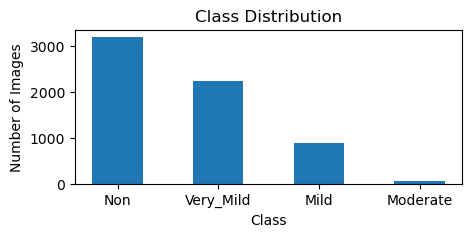

In [47]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 2)
bins = np.linspace(0 - .25, 3 + .25, 8)
ax.hist(dataframe['class_label'].values,bins=bins)
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
plt.show()

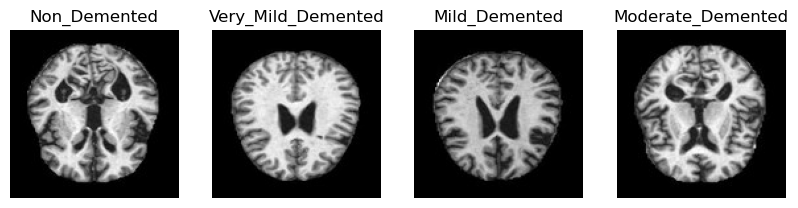

In [48]:
# Display 1 random images from each class

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(10, 5)
for i in range(len(classes)):
    for j in range(1):
        # get random image dataframe
        start = dataframe[dataframe['class_label']==classes[i][:-9]].first_valid_index()
        end = dataframe[dataframe['class_label']==classes[i][:-9]].last_valid_index() 
        sample = np.random.randint(start, end)-start
        dataframe[dataframe['class_label']==classes[i][:-9]].iloc[sample,0]
        random_image = dataframe[dataframe['class_label']==classes[i][:-9]].iloc[sample,0]
        filename = folder_path + classes[i] + '/' + random_image
        ax[i].imshow(plt.imread(filename), cmap='gray')
        ax[i].set_title(classes[i])
        ax[i].axis('off')
plt.show()

In [49]:
folderpath ='/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
image_data = []
for instance in dataframe['filename']:
    # find class label
    folder_name = dataframe[dataframe['filename']==instance]['class_label'].values[0] + '_Demented/'
    image2 = plt.imread(folderpath+folder_name+instance)
    image2_flatten = image2.flatten().T
    image_data.append(image2_flatten)
image_arr = np.array(image_data)
output_labels = np.array(dataframe['class_label'].values)
image_arr.shape, output_labels.shape

((6400, 16384), (6400,))

In [50]:
# Create dataframe
image_df = pd.DataFrame(image_arr)
# Rescale pixel values
#image_df = image_df/255
image_df.columns = image_df.columns.astype(str)
image_df['filename'] = dataframe['filename']
image_df['class_label'] = output_labels
image_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16376,16377,16378,16379,16380,16381,16382,16383,filename,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non.jpg,Non
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_10.jpg,Non
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_100.jpg,Non
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1000.jpg,Non
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1001.jpg,Non


In [51]:
# Shuffle dataframe
image_df = image_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into train, validation and test sets; 80%, 10%, 10%; for each class

# train 
train_df = pd.DataFrame()
for i in range(len(classes)):
    train_df = pd.concat([train_df, image_df[image_df['class_label']==classes[i][:-9]].iloc[:round(class_counts[i]*0.8),:]], axis=0)
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# validation
val_df = pd.DataFrame()
for i in range(len(classes)):
    val_df = pd.concat([val_df, image_df[image_df['class_label']==classes[i][:-9]].iloc[round(class_counts[i]*0.8):round(class_counts[i]*0.9),:]], axis=0)
val_df = val_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
# test
test_df = pd.DataFrame()
for i in range(len(classes)):
    test_df = pd.concat([test_df, image_df[image_df['class_label']==classes[i][:-9]].iloc[round(class_counts[i]*0.9):,:]], axis=0)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

# save dataframe to csv
#image_df.to_csv('image_data-256.csv', index=False)

train_df.shape,val_df.shape, test_df.shape

((5120, 16386), (640, 16386), (640, 16386))

In [74]:
class StandardScaler():
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        if np.any(self.scale_ == 0):
            self.scale_ = np.where(self.scale_ == 0, 1, self.scale_)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [75]:
#from tensorflow.preprocessing import StandardScaler
X_train = train_df.drop(['filename','class_label'], axis=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
X_train = train_df.drop(['filename','class_label'], axis=1).values
y_train = train_df['class_label']
X_val = val_df.drop(['filename','class_label'], axis=1).values
y_val = val_df['class_label']
X_test = test_df.drop(['filename','class_label'], axis=1).values
y_test = test_df['class_label']

# Scale data
# StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

# Encode Labels
# Non: 0, Very Mild: 1, Mild: 2, Moderate: 3
classes_encode = {'Non':0, 'Very_Mild':1, 'Mild':2, 'Moderate':3}
for i in y_train:
    y_train = y_train.replace(i, classes_encode[i])
y_train = y_train.values
for i in y_val:
    y_val = y_val.replace(i, classes_encode[i])
y_val = y_val.values
for i in y_test:
    y_test = y_test.replace(i, classes_encode[i])
y_test = y_test.values
    
print(X_train.shape, y_train.shape,'\n', X_val.shape, y_val.shape,'\n', X_test.shape, y_test.shape)



(5120, 16384) (5120,) 
 (640, 16384) (640,) 
 (640, 16384) (640,)


In [79]:
# Logistic Regression Model

class LogisticRegression():
    def __init__(self):
        self.W=None
        
    def history(self):
        return self.history
    
    def validation(self, X, y, W, lmbda):
        # Find loss and accuracy on validation set
        y_onehot = np.zeros((len(y), 4))
        for i in range(len(y)):
            y_onehot[i][y[i]] = 1
        Z = - X @ W
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        loss = - np.sum(y_onehot * np.log(P)) + lmbda * np.sum(W**2)
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return loss, accuracy
    
    def fit(self, X, y, X_val, y_val, max_iter=400, lr=0.01, lmbda=0, regularization='l2'):
        self.history = np.zeros((4,max_iter//10))
        # One-hot encoding
        y_onehot = np.zeros((len(y), 4))
        for i in range(len(y)):
            y_onehot[i][y[i]] = 1
        # Initialize weights ( shape = features x classes matrix )
        self.W = np.zeros((X.shape[1], y_onehot.shape[1])) 
        for iteration in range(1, max_iter+1):
            Z = - X @ self.W
            # Logistic function to find probabilities
            P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
            # Number of X instances
            N = X.shape[0]
            
            # Derivative of Residual ( log-loss )
            dRSS = 2/N * (X.T @ (y_onehot - P))
            # Choose regularization
            if regularization == 'l2':
                # L2 regularization
                dRegTerm = 2 * lmbda * self.W
            elif regularization == 'l1':
                # L1 regularization
                dRegTerm = lmbda * np.sign(self.W) 
            # Calculate gradient
            gradient = dRSS + dRegTerm
            # Update weights
            self.W = self.W - lr * gradient
            
            # Calculate loss and accuracy every 10 iterations:
            if iteration % 10 == 0:
                loss = - np.sum(y_onehot * np.log(P)) + lmbda * np.sum(self.W**2)
                accuracy = np.mean(self.predict(X) == y)
                val_loss = self.validation(X_val, y_val, self.W, lmbda)[0]
                val_acc = self.validation(X_val, y_val, self.W, lmbda)[1]
                self.history[:,(iteration//10)-1] = np.array([loss, accuracy, val_loss, val_acc])
                
                # Print loss and accuracy every 100 iterations
                if iteration % 100 == 0:
                    line1 = 'Iteration: ' + str(iteration)
                    line2 = ' | Loss: ' + str(round(loss)) + ' | Accuracy: ' + str(accuracy)[0:5]
                    line3 = ' | Val. Loss: ' + str(round(val_loss)) + ' | Val. Acc: ' + str(val_acc)[0:5]
                    print(line1 + line2 + line3)
                
    def predict(self, X):
        Z = - X @ self.W
        # Logistic function to find probabilities
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        # Predict class
        y = np.argmax(P, axis=1)
        return y

In [80]:
# Fit model 
model = LogisticRegression()
model.fit(X_train, y_train, X_val, y_val, 
          max_iter=700, lr=0.01, lmbda=0.01, regularization='l2')

# play sound when finished
os.system(finish_sound)

Iteration: 100 | Loss: 8336 | Accuracy: 0.675 | Val. Loss: 1449 | Val. Acc: 0.548
Iteration: 200 | Loss: 1076 | Accuracy: 0.937 | Val. Loss: 442 | Val. Acc: 0.785
Iteration: 300 | Loss: 458 | Accuracy: 0.990 | Val. Loss: 320 | Val. Acc: 0.831
Iteration: 400 | Loss: 348 | Accuracy: 0.998 | Val. Loss: 290 | Val. Acc: 0.853
Iteration: 500 | Loss: 297 | Accuracy: 0.999 | Val. Loss: 277 | Val. Acc: 0.859
Iteration: 600 | Loss: 265 | Accuracy: 0.999 | Val. Loss: 270 | Val. Acc: 0.865
Iteration: 700 | Loss: 243 | Accuracy: 0.999 | Val. Loss: 265 | Val. Acc: 0.870


0

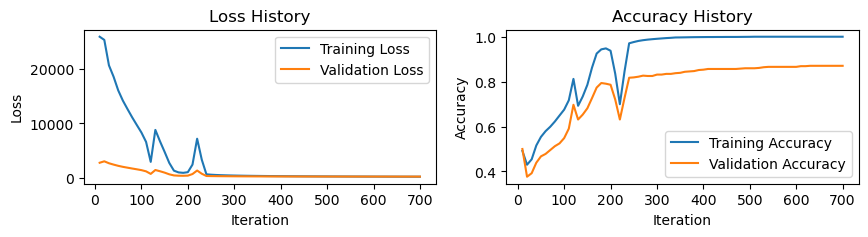

In [81]:
# Plot Loss and Accuracy History as Subplots

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 2)
index = np.arange(1,model.history.shape[1]+1)*10

ax[0].plot(index, model.history[0], label='Training Loss')
ax[0].plot(index, model.history[2], label='Validation Loss')
ax[0].set_title('Loss History')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(index, model.history[1], label='Training Accuracy')
ax[1].plot(index, model.history[3], label='Validation Accuracy')
ax[1].set_title('Accuracy History')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

#plt.savefig('plots.png')
plt.show()

F1 Score is: 91.97 %

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       320
           1       0.91      0.91      0.91       224
           2       0.85      0.90      0.88        90
           3       0.56      0.83      0.67         6

    accuracy                           0.92       640
   macro avg       0.82      0.89      0.85       640
weighted avg       0.92      0.92      0.92       640



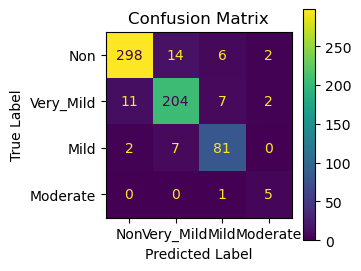

In [16]:
# model results
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# plot loss
#model2.loss_plot()

y_pred = model.predict(X_test)

f1_score = (classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score'])
f1_score = str(round(f1_score*100, 2))
print('F1 Score is: '+ f1_score +' %\n')

#print(confusion_matrix(y_test, y_pred))
#print('\n')
print(classification_report(y_test, y_pred))
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=image_df['class_label'].unique())
disp.plot()

# add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().set_size_inches(3, 3)
plt.show()